<a href="https://colab.research.google.com/github/PedroJuiz/UnsupervisedLearning/blob/main/Asociation_Rules.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="newlogomioti.png" style="height: 100px">
<center style="color:#888">Módulo Data Science in IoT<br/>Asignatura Machine learning 2 (Unsupervised learning)</center>

# Challenge S6: Reglas de asociación para análisis de cesta de la compra

In [ ]:
nombre = "Pedro Juiz Díaz"

In [ ]:
if nombre == "":
    print("Rellena tu nombre y apellidos!")
else:
    print("Gracias!: ", nombre, ":)")

Gracias!:  Pedro Juiz Díaz :)


## Objetivos

El objetivo de este challenge es enfrentarse a un problema de generación de reglas de asociación real: a partir de datos de transacciones de compra de un supermercado, realizar un estudio de la cesta de la compra (*market basket analysis*) mediante la generación de reglas de asociación.

In [ ]:
# Descomentar esto para instalar paquete mlxtend
#import sys
#!{sys.executable} -m pip install mlxtend

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

import pandas as pd

## Carga de datos

Para comenzar, cargamos el fichero de tickets de venta:

In [ ]:
df = pd.read_excel('data/Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


Y lo convertimos al formato esperado por la librería de reglas de asociación

In [ ]:
# Preprocesamiento y filtrado de columnas no útiles
df['Description'] = df['Description'].str.strip()
df.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
df = df[~df['InvoiceNo'].str.contains('C')]

# Filtramos por país, agrupamos por ticket y transponemos
basket = (df[df['Country'] =="Germany"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

In [ ]:
basket.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,...,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Convertimos los binarios a enteros
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

In [ ]:
basket_sets = basket.applymap(encode_units)
basket_sets.drop('POSTAGE', inplace=True, axis=1)

In [ ]:
basket_sets.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,...,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536527,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536840,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536861,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536967,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536983,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


* ¿Cuál es el tamaño de nuestro conjunto de items $I$ ?

In [ ]:
basket_sets.shape

(457, 1694)

* ¿ Cuál es el tamaño de nuestro conjunto de transacciones $D$ ?

In [ ]:
basket_sets.shape

(457, 1694)

## Reglas de asociación con mlxtend

Ahora vamos a utilizar la librería [`mlxtend`](http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/) para generar las reglas de asociación más interesantes en nuestro conjunto de datos.

* Comenzamos calculando el soporte de los itemsets frecuentes de nuestro conjunto, aplicando un umbral mínimo de 0.07:

In [ ]:
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)
frequent_itemsets

/Users/administrador/opt/anaconda3/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.102845,(6 RIBBONS RUSTIC CHARM)
1,0.070022,(ALARM CLOCK BAKELIKE PINK)
2,0.072210,(GUMBALL COAT RACK)
3,0.091904,(JAM MAKING SET PRINTED)
4,0.078775,(JUMBO BAG RED RETROSPOT)
5,0.100656,(JUMBO BAG WOODLAND ANIMALS)
6,0.078775,(LUNCH BAG WOODLAND)
7,0.085339,(PACK OF 72 RETROSPOT CAKE CASES)
8,0.115974,(PLASTERS IN TIN CIRCUS PARADE)
9,0.107221,(PLASTERS IN TIN SPACEBOY)


* Prueba a ejecutar el mismo algoritmo apriori con umbral mínimo de soporte de 0.05 y 0.09. ¿Qué observas? ¿A qué crees que se debe?

Que cada vez aumento el umbral, como es lógico, se obtienen menos valores

In [ ]:
frequent_itemsets = apriori(basket_sets, min_support=0.05, use_colnames=True)
frequent_itemsets

/Users/administrador/opt/anaconda3/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.102845,(6 RIBBONS RUSTIC CHARM)
1,0.070022,(ALARM CLOCK BAKELIKE PINK)
2,0.065646,(CHARLOTTE BAG APPLES DESIGN)
3,0.050328,(CHILDRENS CUTLERY DOLLY GIRL)
4,0.061269,(COFFEE MUG APPLES DESIGN)
5,0.063457,(FAWN BLUE HOT WATER BOTTLE)
6,0.072210,(GUMBALL COAT RACK)
7,0.056893,(IVORY KITCHEN SCALES)
8,0.063457,(JAM JAR WITH PINK LID)
9,0.091904,(JAM MAKING SET PRINTED)


In [ ]:
frequent_itemsets = apriori(basket_sets, min_support=0.09, use_colnames=True)
frequent_itemsets

/Users/administrador/opt/anaconda3/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.102845,(6 RIBBONS RUSTIC CHARM)
1,0.091904,(JAM MAKING SET PRINTED)
2,0.100656,(JUMBO BAG WOODLAND ANIMALS)
3,0.115974,(PLASTERS IN TIN CIRCUS PARADE)
4,0.107221,(PLASTERS IN TIN SPACEBOY)
5,0.137856,(PLASTERS IN TIN WOODLAND ANIMALS)
6,0.096280,(RED TOADSTOOL LED NIGHT LIGHT)
7,0.137856,(REGENCY CAKESTAND 3 TIER)
8,0.157549,(ROUND SNACK BOXES SET OF 4 FRUITS)
9,0.245077,(ROUND SNACK BOXES SET OF4 WOODLAND)


De ahora en adelante utilizaremos el primer soporte calculado con un umbral de valor 0.07.

* ¿Cuál es el item con mayor valor de soporte?

In [ ]:
orden = frequent_itemsets.sort_values(by = 'support', ascending=False)
orden.head(1)

,support,itemsets
9,0.245077,(ROUND SNACK BOXES SET OF4 WOODLAND)


* Ahora vamos a calcular las reglas de asociación utilizando el soporte calculado previamente. Prueba utilizando la métrica confidence con un umbral mínimo de 1.

In [ ]:
as_conf = association_rules(frequent_itemsets, metric="confidence", min_threshold=1)
as_conf

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


* Ahora prueba utilizando la métrica lift con un umbral mínimo de 1.

In [ ]:
as_conf = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
as_conf

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ROUND SNACK BOXES SET OF 4 FRUITS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.157549,0.245077,0.131291,0.833333,3.400298,0.092679,4.529540,0.837922
1,(ROUND SNACK BOXES SET OF4 WOODLAND),(ROUND SNACK BOXES SET OF 4 FRUITS),0.245077,0.157549,0.131291,0.535714,3.400298,0.092679,1.814509,0.935072


* Sobre estas últimas reglas calculadas, filtra aquellas que tengan un lift mayor que 1.5 y un confidence mayor que 0.7

In [ ]:
mask = as_conf[(as_conf['confidence'] > 0.7) & (as_conf['lift'] > 1.5)]
mask

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ROUND SNACK BOXES SET OF 4 FRUITS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.157549,0.245077,0.131291,0.833333,3.400298,0.092679,4.52954,0.837922


* ¿Cómo intepretarías el significado en concreto de estas reglas de asociación generadas?

Que las dos cajas de frutas y comidas se suelen comprar juntas un 80% de las veces. Al tener un valor de lift alto también explica la dependencia entre ambos productos.

## Reglas de asociación a mano

Tomemos como ejemplo la regla de asociación generada en el paso previo. Vamos a realizar los cálculos previamente obtenidos por `mlxtend`, ahora nosotros a mano.

* Comenzamos por el soporte. Calcula el soporte del antecedente, del consecuente y de ambos, de la última regla de asociación (sin utilizar mlxtend).

In [ ]:
total_transactions = len(basket_sets)

In [ ]:
sup_ant = basket_sets['ROUND SNACK BOXES SET OF 4 FRUITS'].sum() / len(basket_sets['ROUND SNACK BOXES SET OF 4 FRUITS'])
sup_ant

0.1575492341356674

In [ ]:
sup_cons = basket_sets['ROUND SNACK BOXES SET OF4 WOODLAND'].sum() / len(basket_sets['ROUND SNACK BOXES SET OF4 WOODLAND'])
sup_cons

0.24507658643326038

In [ ]:
both_transactions = len(basket_sets[(basket_sets['ROUND SNACK BOXES SET OF 4 FRUITS'] == 1) & (basket_sets['ROUND SNACK BOXES SET OF4 WOODLAND'] == 1)])
sup_both = both_transactions / total_transactions
sup_both

0.13129102844638948

* Una vez calculado los soportes, calcula la confianza (confidence) de la regla.

In [ ]:
confidence = sup_both / sup_ant
confidence

0.8333333333333333

* Ahora calcula el lift.

In [ ]:
lift = confidence / sup_cons
lift

3.400297619047619

Comprueba que obtienes los mismos resultados que con `mlxtend`.

## Representación gráfica y análisis país adicional

* Utilizando los datos calculados por `mlxtend`, realizar un scatter plot que represente el `confidence` frente al `lift` de las reglas de asociación obtenidas.

* En el análisis realizado previamente, se filtraron las ventas únicamente de Alemania. Calcular las reglas de asociación para otro país y comparar los resultados obtenidos con los de antes.

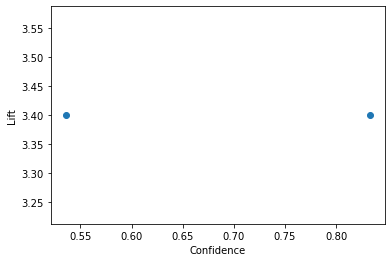

In [ ]:
import matplotlib.pyplot as plt

confidences = as_conf['confidence']
lifts = as_conf['lift']

plt.scatter(confidences, lifts)

plt.xlabel('Confidence')
plt.ylabel('Lift')

plt.show()

In [ ]:
basket = (df[df['Country'] =="United Kingdom"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

In [ ]:
basket.head()

Description,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
basket_sets = basket.applymap(encode_units)
basket_sets.drop('POSTAGE', inplace=True, axis=1)

In [ ]:
basket_sets.head()

Description,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
basket_sets.shape

(18667, 4174)

In [ ]:
frequent_itemsets = apriori(basket_sets, min_support=0.04, use_colnames=True)
frequent_itemsets

/Users/administrador/opt/anaconda3/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.045803,(6 RIBBONS RUSTIC CHARM)
1,0.040339,(60 TEATIME FAIRY CAKE CASES)
2,0.046928,(ALARM CLOCK BAKELIKE GREEN)
3,0.049821,(ALARM CLOCK BAKELIKE RED)
4,0.073445,(ASSORTED COLOUR BIRD ORNAMENT)
...,...,...
57,0.046874,(VINTAGE SNAP CARDS)
58,0.116034,(WHITE HANGING HEART T-LIGHT HOLDER)
59,0.050463,(WOODEN FRAME ANTIQUE WHITE)
60,0.057642,(WOODEN PICTURE FRAME WHITE FINISH)


In [ ]:
orden = frequent_itemsets.sort_values(by = 'support', ascending=False)
orden.head(1)

,support,itemsets
58,0.116034,(WHITE HANGING HEART T-LIGHT HOLDER)


In [ ]:
as_conf = association_rules(frequent_itemsets, metric="confidence", min_threshold=1)
as_conf

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


In [ ]:
as_conf = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
as_conf

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(JUMBO BAG RED RETROSPOT),(JUMBO BAG PINK POLKADOT),0.103820,0.062088,0.042053,0.405057,6.523895,0.035607,1.576473,0.944807
1,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.062088,0.103820,0.042053,0.677308,6.523895,0.035607,2.777201,0.902769


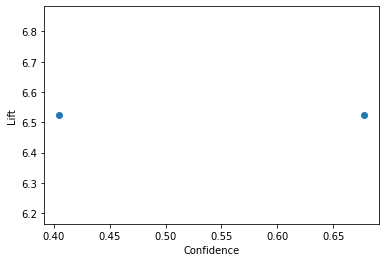

In [ ]:
confidences = as_conf['confidence']
lifts = as_conf['lift']

plt.scatter(confidences, lifts)

plt.xlabel('Confidence')
plt.ylabel('Lift')

plt.show()